In [1]:
# Дана статистика пользователей adult.csv.

# получите значения AUC для различных моделей и их параметров.

# Решением будет ссылка на гитхаб с ноутбуком.


In [2]:
import pandas as pd
import numpy as np
import matplotlib

In [3]:
data_raw = pd.read_csv('adult.csv')
data_raw.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data_raw.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print('\nworkclass:\n',data_raw['workclass'].value_counts())
print('\neducation:\n',data_raw['education'].value_counts())
print('\nmarital-status:\n',data_raw['marital-status'].value_counts())
print('\noccupation:\n',data_raw['occupation'].value_counts())
print('\nrelationship:\n',data_raw['relationship'].value_counts())
print('\nrace:\n',data_raw['race'].value_counts())
print('\ngender:\n',data_raw['gender'].value_counts())
print('\nnative-country:\n',data_raw['native-country'].value_counts())
print('\nincome:\n',data_raw['income'].value_counts())


workclass:
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

education:
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

marital-status:
 Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

occupation:
 Prof-specialty       6172
Craft-repair      

In [7]:
# категориальные переменные закодируем one code encoding
def one_hot_encoding(data, column_list):
    res_data =pd.concat([data,pd.get_dummies(data[column_list])], axis=1)
    res_data= res_data.drop(columns = column_list)
    return res_data
    

In [8]:
data = one_hot_encoding(data_raw, ['workclass','education','marital-status','occupation','relationship','race','native-country'])

data['gender'] = data['gender'].map({'Male':1,'Female':0}) 
data['income'] = data['income'].map({'>50K':1,'<=50K':0}) 

In [9]:
data.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
y = data['income']
X = data.drop(columns=['income'])

In [11]:
# для классификации используем 3 модели:
# 1. DecisionTreeClassifier
# 2. SVC
# 3. KNeighborsClassifier
# 4. LogisticRegression
# 5. XGBClassifier 

In [12]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [13]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
label_est = ['DTC','KNC','LRC','XGBC']
est_list = [DecisionTreeClassifier(), 
            KNeighborsClassifier(), 
            LogisticRegression(),
            XGBClassifier()]
est_greedsearchsv_param = [{'criterion':['gini','entropy'],'max_depth':[3,5,7]},
                           {'n_neighbors':[1,3,5,7],'weights':['uniform', 'distance']},
                           {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1]},
                           {'max_depth': [3, 4, 5]}]

In [17]:
# разделим выборку  на обучающую(train), тестовую(test) и валидационную(valid)
# Валидационную выборку будем использовать для проверки получившихся моделей
# выборки train и test будут получаться при проведении cross_validation

In [29]:
def start(x,y): 
    clf_list = []
    res_est = []
    predictions=[]
    res_roc=[]
    res_prec_recall=[]
    

    X_train_test, X_valid, y_train_test, y_valid = train_test_split(X, y, test_size=0.25)

    for i in range(len(est_list)): 
        clf_list.append(GridSearchCV(est_list[i], est_greedsearchsv_param[i], cv=5))
        print(f'estimator {label_est[i]} готов')
    
    for i in range(len(clf_list)):    
        clf_list[i].fit(X_train_test, y_train_test)
        print(f'estimator {label_est[i]} обучен')
        res_est.append(clf_list[i].best_estimator_)

    for i in range(len(res_est)):
        predictions.append(res_est[i].predict_proba( X_valid ))

    for i in range(len(predictions)):   
        res_roc.append(list(roc_curve( y_valid, predictions[i][:, 1])))
        res_prec_recall.append(list(precision_recall_curve( y_valid, predictions[i][:, 1])))
    
    matplotlib.rcParams['figure.figsize'] = (14, 6)
        
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    
    for i in range(len(res_roc)):    
        ax1.plot( res_roc[i][0], res_roc[i][1], label = label_est[i])
        ax2.plot( res_prec_recall[i][1], res_prec_recall[i][0], label = label_est[i])
    
    ax1.set_title('ROC curve')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    
    ax2.set_title('Prec_recall curve')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    
    ax1.legend( loc = 0 )
    ax2.legend( loc = 0 )
    plt.show()  

    for i in range(len(res_roc)):    
        print(label_est[i],': auc(roc) - ',auc( res_roc[i][0], res_roc[i][1]), ': auc(pr-re) - ',auc( res_prec_recall[i][1], res_prec_recall[i][0]))
        
    return {'estimators': res_est, 'predictions': predictions, 'roc_curves':res_roc, 'precision_recall_curves':res_prec_recall}    

estimator DTC готов
estimator KNC готов
estimator LRC готов
estimator XGBC готов
estimator DTC обучен
estimator KNC обучен
estimator LRC обучен
estimator XGBC обучен


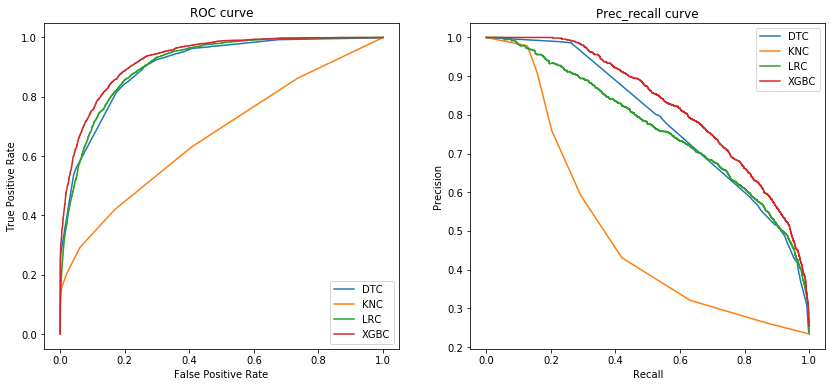

DTC : auc(roc) -  0.9032202468777427 : auc(pr-re) -  0.7859072520503116
KNC : auc(roc) -  0.6685354450973339 : auc(pr-re) -  0.49907980522965584
LRC : auc(roc) -  0.9087447993583795 : auc(pr-re) -  0.7659254557061422
XGBC : auc(roc) -  0.9276134307747071 : auc(pr-re) -  0.824763314413389


In [38]:
res = start(X,y)

In [39]:
# посмотрим наиболее значимые переменные при постройке деревьев

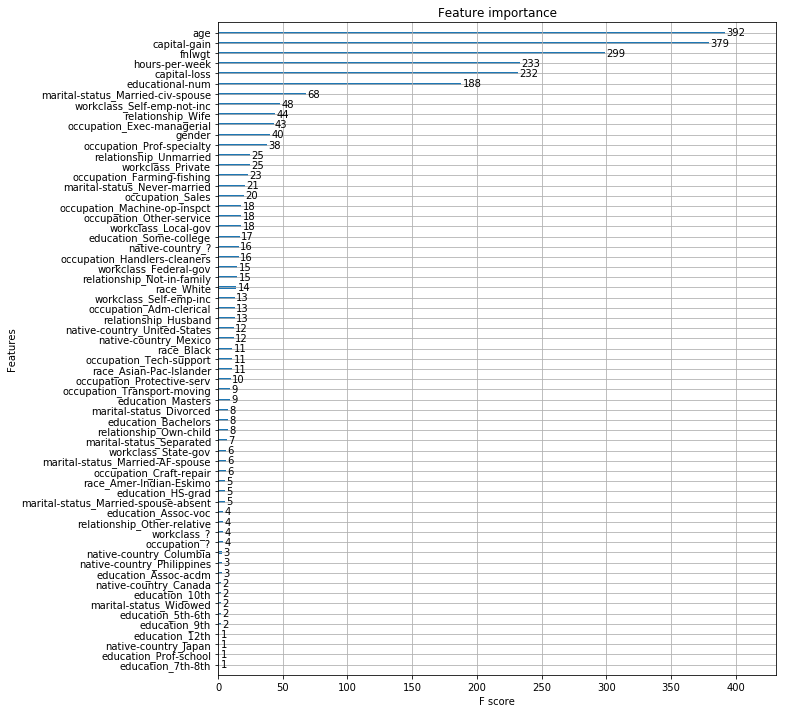

In [40]:
# для  XGBClassifier

import xgboost
matplotlib.rcParams['figure.figsize'] = (10, 12)
xgboost.plot_importance(booster=res['estimators'][3])


In [41]:
FI = dict(zip(X.columns.tolist(), res['estimators'][3].feature_importances_))
sorted_x = sorted(FI.items(), key=lambda kv: -kv[1])
sorted_x[:10]

[('age', 0.15730338),
 ('capital-gain', 0.15208668),
 ('fnlwgt', 0.11998395),
 ('hours-per-week', 0.0934992),
 ('capital-loss', 0.09309791),
 ('educational-num', 0.07544141),
 ('marital-status_Married-civ-spouse', 0.02728732),
 ('workclass_Self-emp-not-inc', 0.019261638),
 ('relationship_Wife', 0.017656501),
 ('occupation_Exec-managerial', 0.017255217)]

In [42]:
# для DecisionTreeClassifier

FI2 = dict(zip(X.columns.tolist(), res['estimators'][0].feature_importances_))
sorted_x = sorted(FI2.items(), key=lambda kv: -kv[1])
sorted_x[:10]

[('marital-status_Married-civ-spouse', 0.4245520131428214),
 ('educational-num', 0.2160080403914292),
 ('capital-gain', 0.20830082692684457),
 ('capital-loss', 0.06712255345587619),
 ('age', 0.037477237361965),
 ('hours-per-week', 0.03199960805686635),
 ('education_Bachelors', 0.00373320143476526),
 ('fnlwgt', 0.0035090322424052027),
 ('relationship_Wife', 0.0032043889694039823),
 ('occupation_Exec-managerial', 0.00224630637240803)]

In [43]:
# из полученного видно, что первые переменные в основнеом одни и те же 
# обучим модели оставив в данных только эти параметры
# 1) marital-status
# 2) educational-num
# 3) capital-gain
# 4) capital-loss
# 5) age
# 6) hours-per-week
# 7) fnlwgt

In [50]:
list_drop = list(set(data_raw.columns.tolist()) - set(['marital-status' , 'educational-num', 'capital-gain', 'capital-loss', 'age', 'hours-per-week','fnlwgt']))

data_raw_red = data_raw.drop(columns=list_drop)

In [51]:
data_raw_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
age                48842 non-null int64
fnlwgt             48842 non-null int64
educational-num    48842 non-null int64
marital-status     48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
dtypes: int64(6), object(1)
memory usage: 2.6+ MB


In [52]:
data2 = one_hot_encoding(data_raw_red, ['marital-status'])

data2.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed
0,25,226802,7,0,0,40,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,0,0,0
2,28,336951,12,0,0,40,0,0,1,0,0,0,0
3,44,160323,10,7688,0,40,0,0,1,0,0,0,0
4,18,103497,10,0,0,30,0,0,0,0,1,0,0


In [53]:
y_2 = y
X_2 = data2

estimator DTC готов
estimator KNC готов
estimator LRC готов
estimator XGBC готов
estimator DTC обучен
estimator KNC обучен
estimator LRC обучен
estimator XGBC обучен


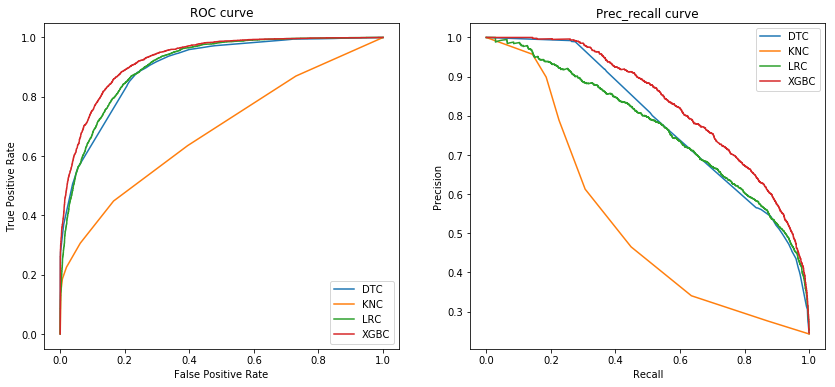

DTC : auc(roc) -  0.899609400499696 : auc(pr-re) -  0.7860163236418227
KNC : auc(roc) -  0.6828251096709163 : auc(pr-re) -  0.527716154874236
LRC : auc(roc) -  0.9058881493413545 : auc(pr-re) -  0.768096565061008
XGBC : auc(roc) -  0.9270777300481716 : auc(pr-re) -  0.8305036730882763


In [54]:
res = start(X_2,y_2)

In [55]:
# Из результатов видно, что уменьшение 
# количества параметров не привело к значительным изменениям точностей модели 